This image is: <class 'numpy.ndarray'> with dimensions: (1260, 1920, 3)


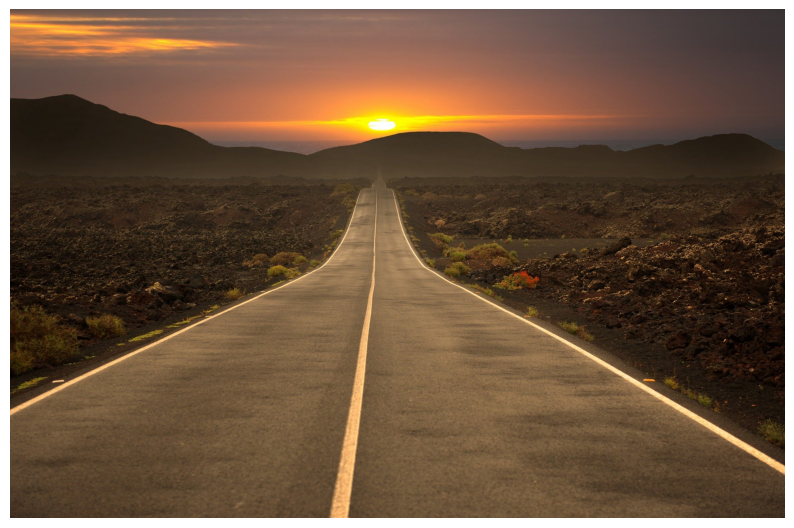

In [ ]:
import cv2
import matplotlib.pyplot as plt

# reading in an image
image = cv2.imread('road.jpg', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# printing out some stats and plotting the image
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(image)
plt.show()

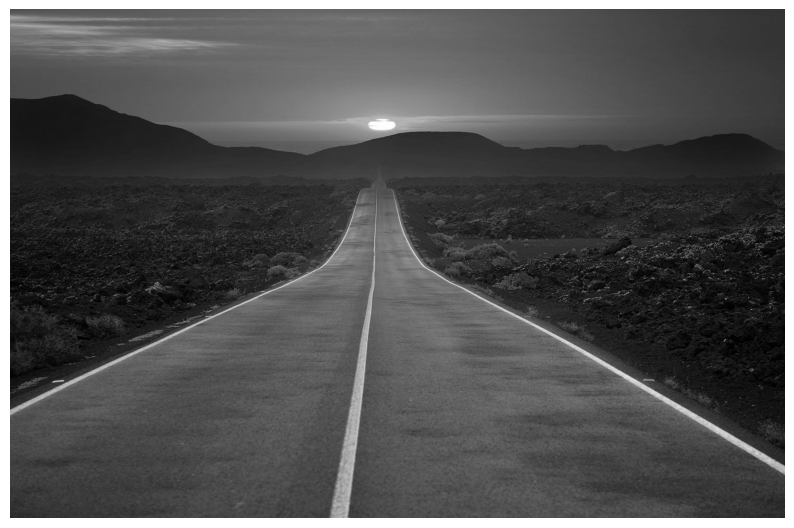

In [ ]:
import cv2
import matplotlib.pyplot as plt

##########################################################
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray = grayscale(image)
##########################################################

plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(gray, cmap = 'gray')
plt.show()

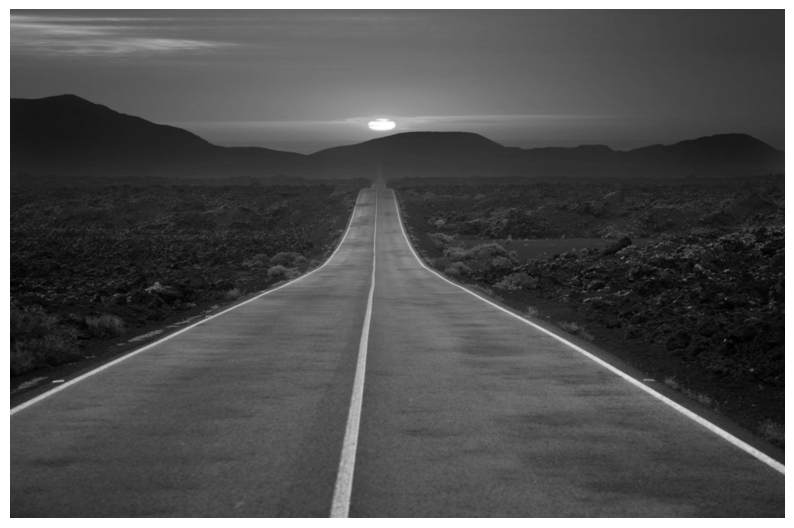

In [ ]:
import cv2
import matplotlib.pyplot as plt

##########################################################
def guassian_blur(image, kernel_size):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size),0)

kernel_size = 5
blur_gray = guassian_blur(gray, kernel_size)
##########################################################

plt.figure(figsize = (10,8))
plt.axis('off')
plt.imshow(blur_gray, cmap = 'gray')
plt.show()

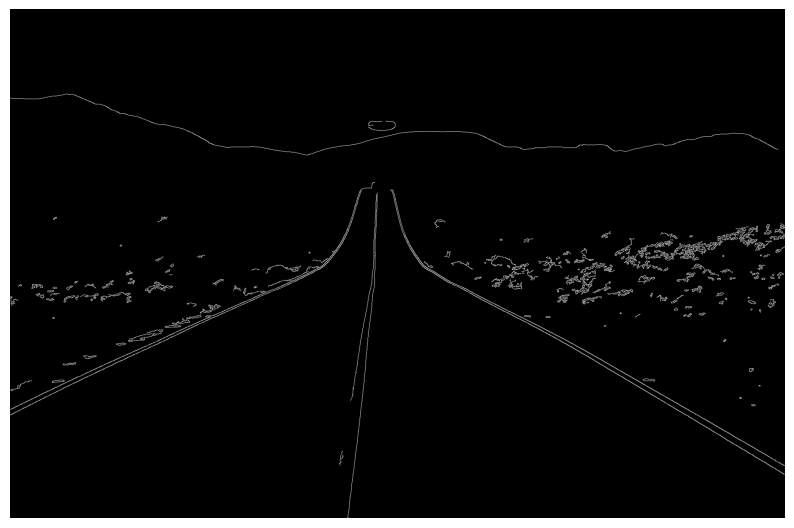

In [ ]:
import cv2
import matplotlib.pyplot as plt

##########################################################
def canny(img, low_threshold, high_threshold):
    return cv2.Canny(img, low_threshold, high_threshold)

low_threshold = 50
high_threshold = 200
edges = canny(blur_gray, low_threshold, high_threshold)
##########################################################
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(edges, cmap = 'gray')
plt.show()

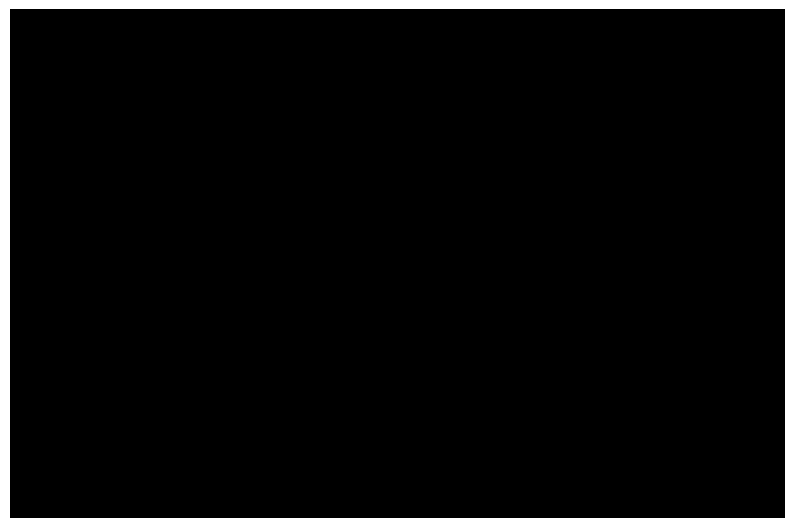

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 

##########################################################
mask = np.zeros_like(image)
##########################################################
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(mask, cmap = 'gray')
plt.show()

(1260, 1920, 3)
1260


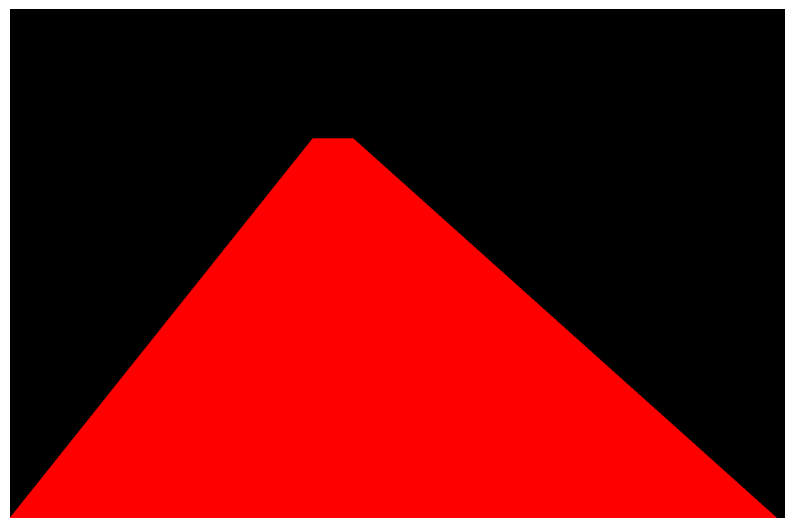

In [ ]:
import cv2
import matplotlib.pyplot as plt

##########################################################
if len(image.shape) > 2:
    channel_count = image.shape[2]
    ignore_mask_color = (255,)
else:
    ignore_mask_color = 255

#imshape =image.shape
height, width = image.shape[:2]
print(image.shape)

v2 = np.array([[(0,height),
                (750, 320),
                (850, 320),
                (width-20,height)]], dtype = np.int32)

cv2.fillPoly(mask, v2, ignore_mask_color)
##########################################################
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(mask, cmap = 'gray')
plt.show()

In [ ]:
import cv2

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)

    if len(img.shape) > 2:
        channel_count = img.shape[2]
        ignore_mask_color = (255, ) * channel_count
    else:
        ignore_mask_color = 255
    
    cv2.fillPoly(mask, vertices, ignore_mask_color)

    masked_image = cv2.bitwise_and(img, mask)
    
    return masked_image

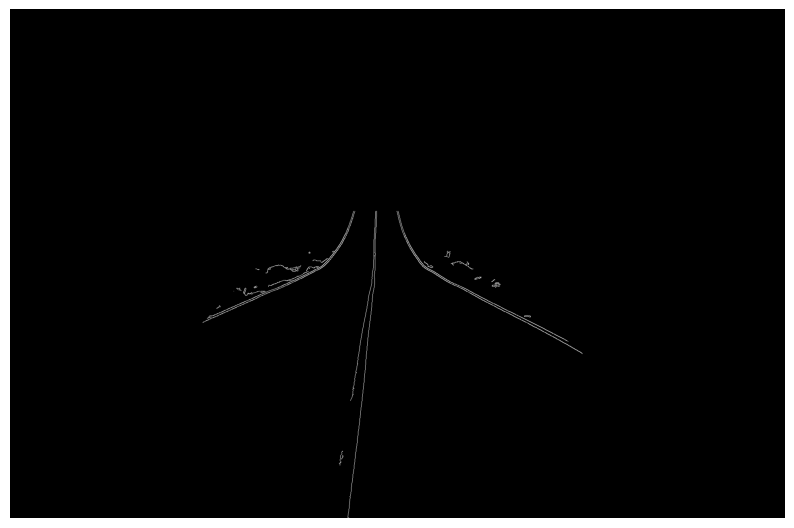

In [ ]:
import cv2
import matplotlib.pyplot as plt

##########################################################
height, width = image.shape[:2]
print(image.shape)

vertices = np.array([[(0,height),
                    (750, 500),
                    (1000, 500),
                    (width-20,height)]], dtype = np.int32)

mask = region_of_interest(edges, vertices)
##########################################################
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(mask, cmap = 'gray')
plt.show()

In [ ]:
import cv2
import matplotlib.pyplot as plt

def draw_lines(image, lines, color=[255,0,0], thickness=5):
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(image, (x1,y1),(x2,y2), color, thickness)

def hough_lines(image, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(image, rho, theta, threshold, np.array([]), 
                            minLineLength = min_line_len, 
                            maxLineGap = max_line_gap)
    line_img = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

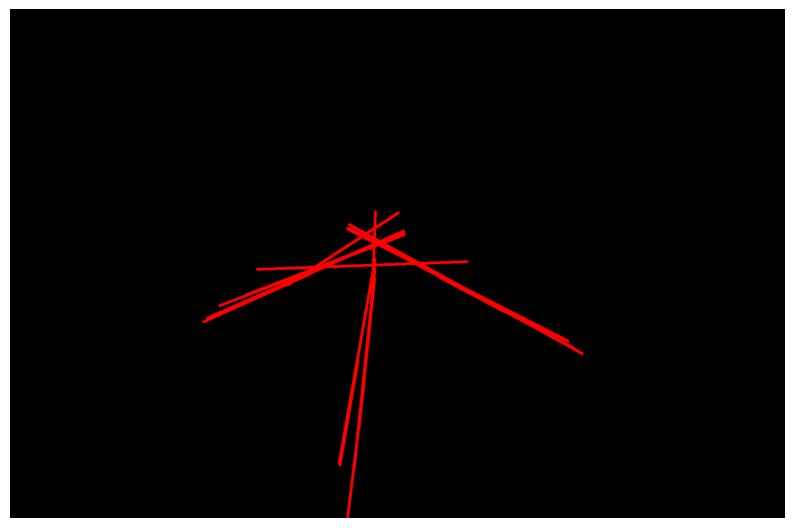

In [ ]:
rho = 2
theta = np.pi/180
threshold = 90
min_line_len = 120
max_line_gap = 150

lines = hough_lines(mask, rho, theta, threshold, min_line_len, max_line_gap)
##########################################################
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(lines, cmap = 'gray')
plt.show()